В цьому домашньому завданні ми проведемо додаткові експерименти для рішення задачі бінарної класифікації і створимо ваш новий submission на змагання на Kaggle.

-----------


**Завдання 0**. Завантажте дані `train.csv`, `test.csv`, `sample_submission.csv` зі змагання на Kaggle ["Bank Customer Churn Prediction (DLU Course)"](https://www.kaggle.com/t/7c080c5d8ec64364a93cf4e8f880b6a0). Для завантаження потрібно долучитись до змагання (натиснути кнопку "Join").

**Завдання 1**. **Збираємо весь код з попереднього ДЗ в одному місці.** В лекційному ноутбуці `Логістична регресія з ScikitLearn. Повна ML задача.ipynb` ми познайомились з поняттям пайплайнів, а також я показала, як компактно виглядає рішення МЛ задачі, якщо ми зберемо весь код разом.

Оскільки ми далі будемо робити експерименти, які включають ті самі етапи попередньої обробки, але інше моделювання - буде зручно мати весь код компактно і під рукою. Тому зараз ми займемось збором коду до купи :) Після цього завдання для подальших експериментів ви можете перенести частини розвʼязку взагалі в окремий `.py` файл, аби було зручно імпортувати функції.

Зі свого рішення в попередньому домашньому завданні (`Логістична регресія з scikit learn.ipynb`) зберіть усі кроки розвʼязку задачі разом з використанням `sklearn.Pipeline` за прикладом з лекції.

Ваш код нижче має містити
1. Читання даних з файлу (поза пайплайном).
2. Розбиття на тренувальний і валідаційний набори, де валідаційний містить 20% даних (поза пайплайном).
3. Виділення категоріальних і числових колонок (поза пайплайном).
4. Підготовку категоріальних і числових колонок (частина пайплайну). В прикладі в лекції ми оформлювали обробку числових і категоріальних колонок в окремі трансформери `numeric_transformer`, `categorical_cols`. Рекоемндую зробити саме так, так потім зручніше вносити зміни :)
5. Тренування лог регресії (частина пайплайну).
6. Запуск пайплайну на тренування на трен. даних (поза пайплайном).
7. Запуск пайплайну на передбачення на трен і вал. даних і вимір метрик якості ROC-AUC + вивдення Confusion Matrix (поза пайплайном).
8. Збереження моделі в формат joblib (поза пайплайном).

Ви це все вже зробили в попереднтьому ДЗ! Тож, тут просто заадча все зібрати разом.

Нижче я додала підказки, що покроково ви маєте зробити. Якщо ви почуваєтесь впевнено, можете видалити ці підказки і реалізувати все самостійно, або ж - просто заповнити пропуски.

Завдання оцінюється в 10 балів. Головний результат - аби код в фіналі був робочий. Бо за не робочий нам гроші ніхто не заплатить :)

In [105]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression, LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.metrics import roc_auc_score, confusion_matrix, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

In [13]:
raw_df = pd.read_csv("train.csv", index_col=0)
raw_df.head(5)

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
id,,,,,,,,,,,,,
0,15779985.0,Nwankwo,678.0,France,Male,29.0,4.0,0.00,3.0,1.0,0.0,180626.36,0.0
1,15650086.0,Ch'in,687.0,France,Female,34.0,1.0,0.00,2.0,0.0,1.0,63736.17,0.0
2,15733602.0,Thompson,682.0,France,Female,52.0,6.0,0.00,3.0,0.0,0.0,179655.87,1.0
3,15645794.0,Macleod,753.0,Germany,Male,44.0,6.0,83347.25,2.0,1.0,0.0,161407.48,0.0
4,15633840.0,Hsia,544.0,Germany,Female,55.0,0.0,107747.57,1.0,1.0,0.0,176580.86,1.0


In [37]:
numeric_cols = train_inputs.select_dtypes(include=np.number).columns.tolist()
categorical_cols = train_inputs.select_dtypes('object').columns.tolist()

numeric_cols,categorical_cols

(['CustomerId',
  'CreditScore',
  'Age',
  'Tenure',
  'Balance',
  'NumOfProducts',
  'HasCrCard',
  'IsActiveMember',
  'EstimatedSalary'],
 ['Surname', 'Geography', 'Gender'])

Area under ROC score on Training dataset: 0.90%


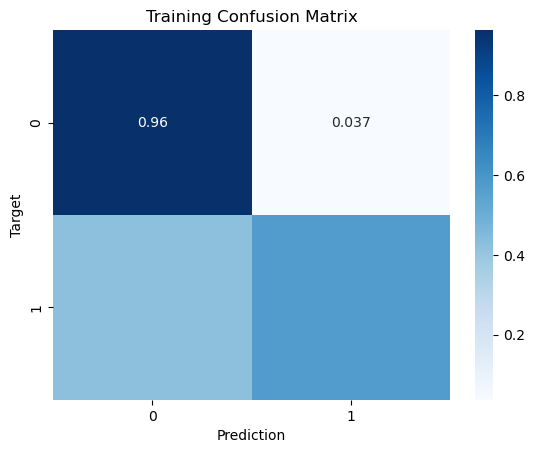

Area under ROC score on Validation dataset: 0.88%


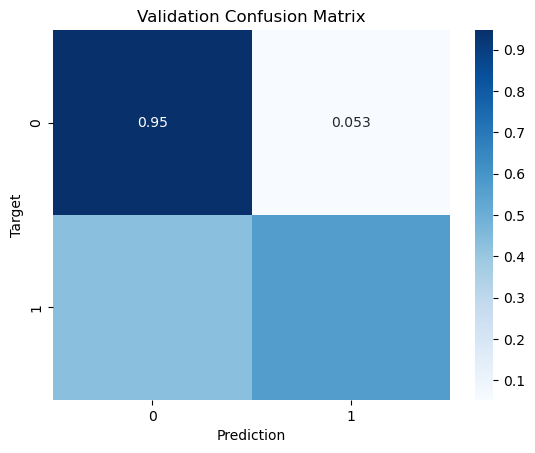

['model_pipeline.joblib']

In [47]:
raw_df = pd.read_csv("train.csv", index_col=0)

input_cols = ['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary']
target_col = ['Exited']

train_df, val_df = train_test_split(raw_df, test_size=0.2, stratify=raw_df[target_col], random_state=42)

# Створюємо трен. і вал. набори
train_inputs, train_targets = train_df[input_cols], train_df[target_col].values.ravel() 
val_inputs, val_targets = val_df[input_cols], val_df[target_col].values.ravel() 

# Виявляємо числові і категоріальні колонки
numeric_cols = train_inputs.select_dtypes(include=np.number).columns.tolist()
categorical_cols = train_inputs.select_dtypes('object').columns.tolist()

# Створюємо трансформери для числових і категоріальних колонок
numeric_transformer = Pipeline(steps=[
    ('scaler', MinMaxScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(sparse_output=False, handle_unknown='ignore'))
])

# Комбінуємо трансформери для різних типів колонок в один препроцесор
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Стоврюємо пайплайн, який спочатку запускає препроцесинг, потім тренуєм модель
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(solver='liblinear'))
])

# Тренуємо пайплайн
model_pipeline.fit(train_inputs, train_targets)

# Функція, щоб передбачати і рахувати метрики
def predict_and_plot(model_pipeline, inputs, targets, name=''):
    preds = model_pipeline.predict(inputs)
    roc_auc = roc_auc_score(targets, model_pipeline.predict_proba(inputs)[:, 1]
                           )
    print(f"Area under ROC score on {name} dataset: {roc_auc:.2f}%")
    confusion_matrix_ = confusion_matrix(targets, preds, normalize='true')
    plt.figure()
    sns.heatmap(confusion_matrix_, annot=True, cmap='Blues')
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name))
    plt.show()
    return preds

# Оцінюємо модель на трен і вал даних
train_preds = predict_and_plot(model_pipeline, train_inputs, train_targets, name='Training')
val_preds = predict_and_plot(model_pipeline, val_inputs, val_targets, name='Validation')

# Зберігаємо модель для подальшого використання
joblib.dump(model_pipeline, 'model_pipeline.joblib')

**Завдання 2**. Такс, у нас з вами є вже готовий пайплайн. Давайте проведемо нові експерименти.

  Додайте в попередню обробку числових колонок генерацію polinomal features до степені 2 включно. Для цього створіть новий препроцесор і створіть новий пайплайн.

  Запустіть пайплайн на тренування і виведіть метрики для тренувального і валідаційного набору. Напишіть, як вам модель? Чи спостерігається в цій моделі overfit чи underfit? Чи ця модель добре генералізує?

Area under ROC score on Training dataset: 0.93%


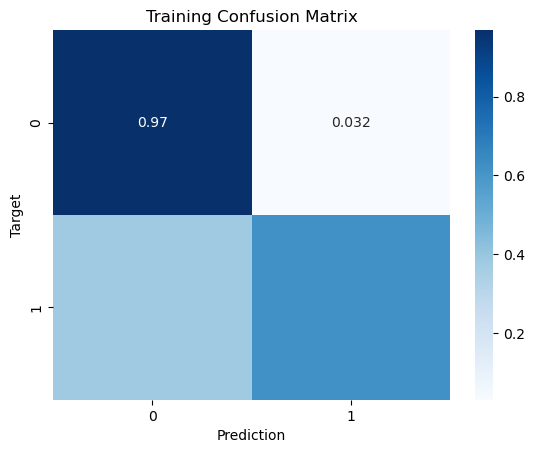

Area under ROC score on Validation dataset: 0.91%


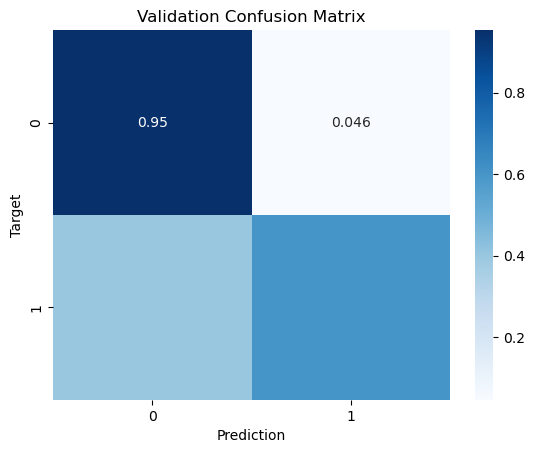

['model_pipeline.joblib']

In [51]:
from sklearn.preprocessing import PolynomialFeatures

raw_df = pd.read_csv("train.csv", index_col=0)

input_cols = ['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary']
target_col = ['Exited']

train_df, val_df = train_test_split(raw_df, test_size=0.2, stratify=raw_df[target_col], random_state=42)

# Створюємо трен. і вал. набори
train_inputs, train_targets = train_df[input_cols], train_df[target_col].values.ravel() 
val_inputs, val_targets = val_df[input_cols], val_df[target_col].values.ravel() 

# Виявляємо числові і категоріальні колонки
numeric_cols = train_inputs.select_dtypes(include=np.number).columns.tolist()
categorical_cols = train_inputs.select_dtypes('object').columns.tolist()

# Створюємо трансформери для числових і категоріальних колонок
numeric_transformer = Pipeline(steps=[
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),  # Додаємо поліноміальні ознаки
    ('scaler', MinMaxScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(sparse_output=False, handle_unknown='ignore'))
])

# Комбінуємо трансформери для різних типів колонок в один препроцесор
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Стоврюємо пайплайн, який спочатку запускає препроцесинг, потім тренуєм модель
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(solver='liblinear'))
])

# Тренуємо пайплайн
model_pipeline.fit(train_inputs, train_targets)

# Функція, щоб передбачати і рахувати метрики
def predict_and_plot(model_pipeline, inputs, targets, name=''):
    preds = model_pipeline.predict(inputs)
    roc_auc = roc_auc_score(targets, model_pipeline.predict_proba(inputs)[:, 1]
                           )
    print(f"Area under ROC score on {name} dataset: {roc_auc:.2f}%")
    confusion_matrix_ = confusion_matrix(targets, preds, normalize='true')
    plt.figure()
    sns.heatmap(confusion_matrix_, annot=True, cmap='Blues')
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name))
    plt.show()
    return preds

# Оцінюємо модель на трен і вал даних
train_preds = predict_and_plot(model_pipeline, train_inputs, train_targets, name='Training')
val_preds = predict_and_plot(model_pipeline, val_inputs, val_targets, name='Validation')

# Зберігаємо модель для подальшого використання
joblib.dump(model_pipeline, 'model_pipeline.joblib')

Згідно з ROC AUC score ця модель показала себе краще на тренвальних та валідаціних даних.

**Завдання 3**. Тепер давайте створимо ще новий пайплайн, тільки тепер поліноміальні ознаки згенеруємо до степені 4. Зробіть висновок про якість моделі. Якщо вам подобається резульат якоїсь з моделей в цьому ДЗ - рекомендую зробити submission в змаганні.

Area under ROC score on Training dataset: 0.94%


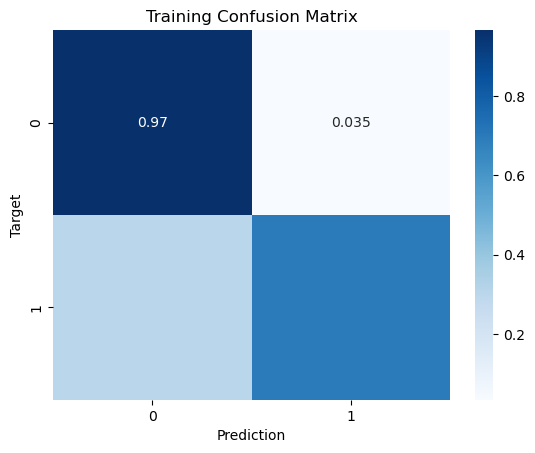

Area under ROC score on Validation dataset: 0.93%


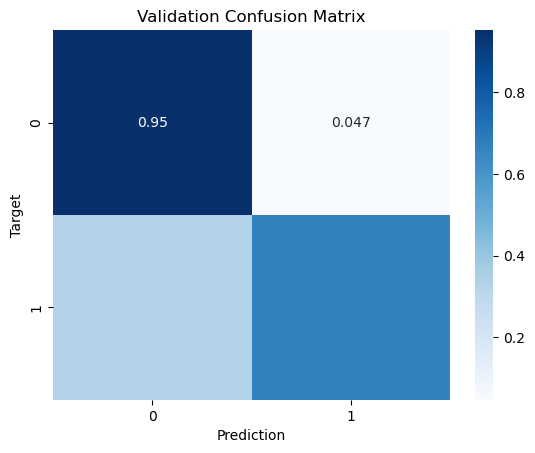

['model_pipeline.joblib']

In [53]:
from sklearn.preprocessing import PolynomialFeatures

raw_df = pd.read_csv("train.csv", index_col=0)

input_cols = ['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary']
target_col = ['Exited']

train_df, val_df = train_test_split(raw_df, test_size=0.2, stratify=raw_df[target_col], random_state=42)

# Створюємо трен. і вал. набори
train_inputs, train_targets = train_df[input_cols], train_df[target_col].values.ravel() 
val_inputs, val_targets = val_df[input_cols], val_df[target_col].values.ravel() 

# Виявляємо числові і категоріальні колонки
numeric_cols = train_inputs.select_dtypes(include=np.number).columns.tolist()
categorical_cols = train_inputs.select_dtypes('object').columns.tolist()

# Створюємо трансформери для числових і категоріальних колонок
numeric_transformer = Pipeline(steps=[
    ('poly', PolynomialFeatures(degree=4, include_bias=False)),  # Додаємо поліноміальні ознаки
    ('scaler', MinMaxScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(sparse_output=False, handle_unknown='ignore'))
])

# Комбінуємо трансформери для різних типів колонок в один препроцесор
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Стоврюємо пайплайн, який спочатку запускає препроцесинг, потім тренуєм модель
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(solver='liblinear'))
])

# Тренуємо пайплайн
model_pipeline.fit(train_inputs, train_targets)

# Функція, щоб передбачати і рахувати метрики
def predict_and_plot(model_pipeline, inputs, targets, name=''):
    preds = model_pipeline.predict(inputs)
    roc_auc = roc_auc_score(targets, model_pipeline.predict_proba(inputs)[:, 1]
                           )
    print(f"Area under ROC score on {name} dataset: {roc_auc:.2f}%")
    confusion_matrix_ = confusion_matrix(targets, preds, normalize='true')
    plt.figure()
    sns.heatmap(confusion_matrix_, annot=True, cmap='Blues')
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name))
    plt.show()
    return preds

# Оцінюємо модель на трен і вал даних
train_preds = predict_and_plot(model_pipeline, train_inputs, train_targets, name='Training')
val_preds = predict_and_plot(model_pipeline, val_inputs, val_targets, name='Validation')

# Зберігаємо модель для подальшого використання
joblib.dump(model_pipeline, 'model_pipeline.joblib')

Згідно з ROC AUC score ця модель показала себе ще краще на тренвальних та валідаціних даних. Вона наразі найкраща

**Завдання 4. Перенавчання і регуляризація**.

  Скачайте набір даних `regression_data.csv`. Звичайте набір даних з `regression_data.csv`, розбийте на train і test (в тест 20%) і натренуйте модель лінійної регресії з масштабуванням числових ознак і поліноміальними ознаками до степені **5 включно**.

  Виміряйте якість прогностичної моделі і зробіть висновок, чи модель хороша, чи вона добре генералізує?


In [90]:
raw_df = pd.read_csv('regression_data.csv')
raw_df.columns

Index(['feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5',
       'target'],
      dtype='object')

In [78]:
raw_df.target

feature_1
-0.190339    28.938854
-0.321386    -7.664581
 2.122156   -63.845482
-1.380101     4.076259
-0.072829    34.879013
               ...    
 1.402794    39.626185
-0.288659   -50.585687
-1.407464    13.719861
 1.353872   -23.851350
-0.849844    12.870252
Name: target, Length: 129, dtype: float64

Columns in the DataFrame: ['feature_2', 'feature_3', 'feature_4', 'feature_5', 'target']
Mean Squared Error on Training dataset: 0.00
R^2 Score on Training dataset: 1.00


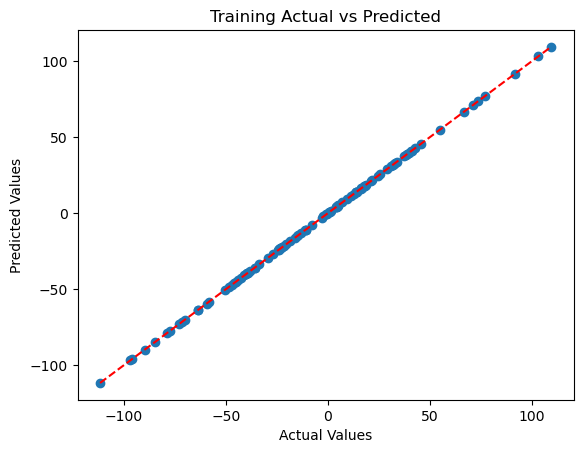

Mean Squared Error on Validation dataset: 8019.57
R^2 Score on Validation dataset: -2.44


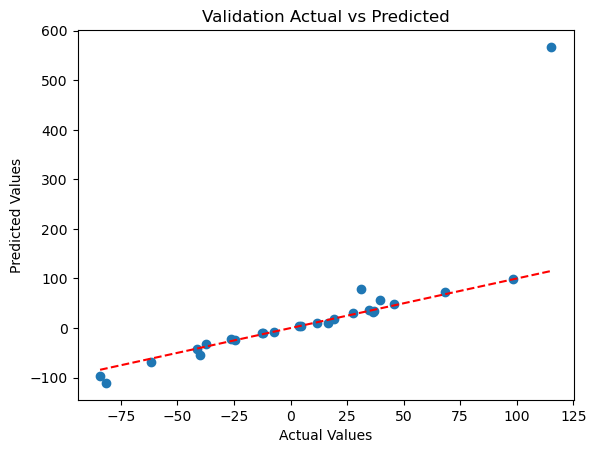

['model_pipeline.joblib']

In [100]:
# Завантажуємо дані
raw_df = pd.read_csv('regression_data.csv', index_col=0)

# Перевіряємо наявність колонок
print("Columns in the DataFrame:", raw_df.columns.tolist())

input_cols = ['feature_2', 'feature_3', 'feature_4', 'feature_5']
target_col = ['target'] 

# Розбиваємо на тренувальні та валідаційні набори
train_df, val_df = train_test_split(raw_df, test_size=0.2, random_state=42)

# Створюємо тренувальні та валідаційні набори
train_inputs, train_targets = train_df[input_cols], train_df[target_col].values.ravel()
val_inputs, val_targets = val_df[input_cols], val_df[target_col].values.ravel()

# Визначаємо числові та категоріальні колонки
numeric_cols = train_inputs.select_dtypes(include=np.number).columns.tolist()
categorical_cols = train_inputs.select_dtypes('object').columns.tolist()

# Створюємо трансформери для числових і категоріальних колонок
numeric_transformer = Pipeline(steps=[
    ('poly', PolynomialFeatures(degree=5, include_bias=False)),  # Додаємо поліноміальні ознаки
    ('scaler', MinMaxScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(sparse_output=False, handle_unknown='ignore'))
])

# Комбінуємо трансформери для різних типів колонок в один препроцесор
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Створюємо пайплайн, який спочатку запускає препроцесинг, потім тренуємо модель
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())  # Використовуємо лінійну регресію
])

# Тренуємо пайплайн
model_pipeline.fit(train_inputs, train_targets)

# Функція для прогнозування та розрахунку метрик
def predict_and_plot(model_pipeline, inputs, targets, name=''):
    preds = model_pipeline.predict(inputs)
    mse = mean_squared_error(targets, preds)
    r2 = r2_score(targets, preds)
    
    print(f"Mean Squared Error on {name} dataset: {mse:.2f}")
    print(f"R^2 Score on {name} dataset: {r2:.2f}")
    
    plt.figure()
    plt.scatter(targets, preds)
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(f'{name} Actual vs Predicted')
    plt.plot([min(targets), max(targets)], [min(targets), max(targets)], color='red', linestyle='--')
    plt.show()
    
    return preds

# Оцінюємо модель на тренувальних і валідаційних даних
train_preds = predict_and_plot(model_pipeline, train_inputs, train_targets, name='Training')
val_preds = predict_and_plot(model_pipeline, val_inputs, val_targets, name='Validation')

# Зберігаємо модель для подальшого використання
joblib.dump(model_pipeline, 'model_pipeline.joblib')

очевидно, що модель перетренована і дуже погано генералізує

**Завдання 5**. Натренуйте моделі Lasso(), Ridge(), ElasaticNet() на цих даних (з поліном ознаками до степені 20 включно), порівняйте якість з тою, яка була отримана з лінійною регресією. Яка модель найкраще генералізує і чому на ваш погляд (можливо треба буде для відповіді зробити додатковий аналіз ознак)?

In [109]:
# Завантажуємо дані
raw_df = pd.read_csv('regression_data.csv', index_col=0)

# Перевіряємо наявність колонок
print("Columns in the DataFrame:", raw_df.columns.tolist())

input_cols = ['feature_2', 'feature_3', 'feature_4', 'feature_5']
target_col = 'target'

# Розбиваємо на тренувальні та валідаційні набори
train_df, val_df = train_test_split(raw_df, test_size=0.2, random_state=42)

# Створюємо тренувальні та валідаційні набори
train_inputs, train_targets = train_df[input_cols], train_df[target_col].values.ravel()
val_inputs, val_targets = val_df[input_cols], val_df[target_col].values.ravel()

# Визначаємо числові та категоріальні колонки
numeric_cols = train_inputs.select_dtypes(include=np.number).columns.tolist()
categorical_cols = train_inputs.select_dtypes('object').columns.tolist()

# Створюємо трансформери для числових і категоріальних колонок
numeric_transformer = Pipeline(steps=[
    ('poly', PolynomialFeatures(degree=20, include_bias=False)),  
    ('scaler', MinMaxScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(sparse_output=False, handle_unknown='ignore'))
])

# Комбінуємо трансформери для різних типів колонок в один препроцесор
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Функція для тренування моделі і оцінки її якості
def train_and_evaluate(model, model_name):
    model_pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', model)
    ])
    
    # Тренуємо модель
    model_pipeline.fit(train_inputs, train_targets)
    
    # Прогнозуємо на тренувальних та валідаційних даних
    train_preds = model_pipeline.predict(train_inputs)
    val_preds = model_pipeline.predict(val_inputs)
    
    # Оцінка якості
    train_mse = mean_squared_error(train_targets, train_preds)
    val_mse = mean_squared_error(val_targets, val_preds)
    train_r2 = r2_score(train_targets, train_preds)
    val_r2 = r2_score(val_targets, val_preds)
    
    print(f"{model_name} - Training MSE: {train_mse:.2f}, R^2: {train_r2:.2f}")
    print(f"{model_name} - Validation MSE: {val_mse:.2f}, R^2: {val_r2:.2f}")
    
    return model_pipeline

# Тренуємо і оцінюємо моделі
lasso_pipeline = train_and_evaluate(Lasso(alpha=0.1), "Lasso")
ridge_pipeline = train_and_evaluate(Ridge(alpha=0.1), "Ridge")
elastic_net_pipeline = train_and_evaluate(ElasticNet(alpha=0.1), "ElasticNet")

# Зберігаємо моделі для подальшого використання
joblib.dump(lasso_pipeline, 'lasso_pipeline.joblib')
joblib.dump(ridge_pipeline, 'ridge_pipeline.joblib')
joblib.dump(elastic_net_pipeline, 'elastic_net_pipeline.joblib')

Columns in the DataFrame: ['feature_2', 'feature_3', 'feature_4', 'feature_5', 'target']
Lasso - Training MSE: 1.44, R^2: 1.00
Lasso - Validation MSE: 1.01, R^2: 1.00
Ridge - Training MSE: 3.90, R^2: 1.00
Ridge - Validation MSE: 60.53, R^2: 0.97
ElasticNet - Training MSE: 381.78, R^2: 0.80
ElasticNet - Validation MSE: 5447.48, R^2: -1.33


['elastic_net_pipeline.joblib']

Виходить, що найкраща модель Лассо.